In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## EDA of reviews and ratings of Coursera courses

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# styles for seaborn
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_color_codes("pastel")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/drive/My Drive/Research/EduKC/unstructured"))

# Any results you write to the current directory are saved as output.

['activity-hero-new.csv', 'result.json', 'reviews_by_course.csv']


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### First import the dataset and output 5 first rows.

In [3]:
# import the dataset which contains ratings (Label) and reviews (Review) grouped by Course ID
data = pd.read_csv("/content/drive/My Drive/Research/EduKC/unstructured/reviews_by_course.csv")
data.head()

,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5


### Inspect the dataset. Looks like three reviews (Review) are missing and thre is no missing ratings (Label).
Fill missing reviews with empty string.

In [4]:
# inspect dataset for missing values
print(data.info())
# fill NaN with empty string
data = data.fillna("")
# inspect dataset again
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140320 entries, 0 to 140319
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   CourseId  140320 non-null  object
 1   Review    140317 non-null  object
 2   Label     140320 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140320 entries, 0 to 140319
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   CourseId  140320 non-null  object
 1   Review    140320 non-null  object
 2   Label     140320 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ MB
None


### There are 1835 unique courses in the dataset.

In [5]:
# unique course ID
len(data["CourseId"].unique())

1835

### Let's find courses with the highest number of reviews/ratings for the course.
And print top20.

In [6]:
# find most popular courses
reviews_number = data["CourseId"].value_counts()
# show top20 courses by the reviews number
print(reviews_number[:20])

machine-learning                          8570
learning-how-to-learn                     7090
python                                    5906
python-data                               2372
python-network-data                       1844
data-scientists-tools                     1637
html-css-javascript                       1544
r-programming                             1292
grammar-punctuation                       1267
ml-foundations                            1247
html-css-javascript-for-web-developers    1122
childnutrition                            1117
html                                      1101
food-and-health                            990
python-databases                           940
calculus1                                  899
negotiation-skills                         835
web-frameworks                             832
happiness                                  805
work-smarter-not-harder                    768
Name: CourseId, dtype: int64


### Not surprising that Machine Learning by Andrew Ng has the most ratings. Perhaps, it is one of the best courses on Coursera!
### Let's see how ahead of other top20 courses it is.

[Text(0, 0.5, 'Course ID'), Text(0.5, 0, 'number of ratings')]

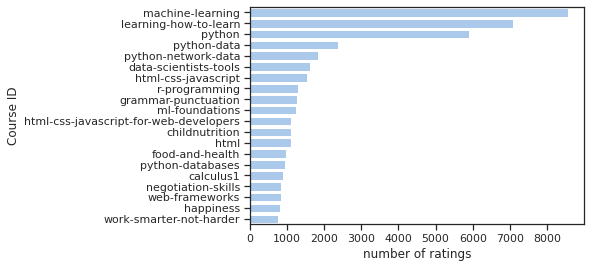

In [7]:
# plot barplot
sns.barplot(y=reviews_number[:20].index, x=reviews_number[:20],color="b").set(xlabel="number of ratings", ylabel="Course ID")

### Time to find average ratings of the courses.
Showed distribution of the average rating using histogram.

[Text(0, 0.5, 'number of courses'), Text(0.5, 0, 'average rating')]

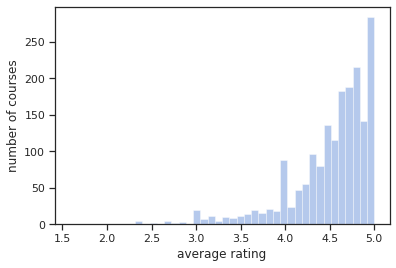

In [8]:
# average rating of the course
average_rating = data.groupby("CourseId").mean().sort_values("Label", ascending=False)
# plot histogram
sns.distplot(average_rating, kde=False).set(xlabel="average rating", ylabel="number of courses")

Zoomed in x-axis to see the 3.8 - 5 range in details. 

[Text(0, 0.5, 'number of courses'), Text(0.5, 0, 'average rating')]

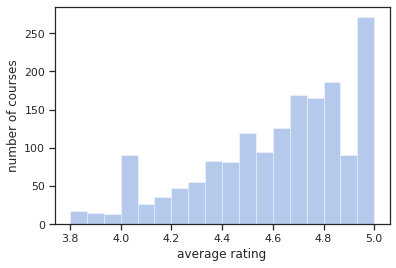

In [9]:
# plot histogram for average rating >= 3.8
sns.distplot(average_rating[average_rating.Label >= 3.8], kde=False).set(xlabel="average rating", ylabel="number of courses",)

### 5.0, 4.0 and 3.0 seem to be outliers. I am wondering how many courses have average rating 5.0?
Turns out 239 or 13% of the total number of courses!

In [10]:
# number of courses with average rating 5.0
av_rating_5 = int(average_rating[average_rating.Label==5.0].count())
print("Number of courses with average rating 5.0:")
print(av_rating_5)
print("% of the total number of courses:")
print(av_rating_5/len(data["CourseId"].unique())*100)

Number of courses with average rating 5.0:
239
% of the total number of courses:
13.024523160762943


### The courses with average rating 5.0 have only from 1 to 32 ratings with median number of ratings equal to 3.

In [11]:
# extract review numbers for courses with average rating 5.0
df_av_rating_5 = pd.DataFrame(reviews_number)[average_rating.Label==5.0]
# explore statistics
print(df_av_rating_5.describe())

         CourseId
count  239.000000
mean     3.874477
std      3.909821
min      1.000000
25%      1.000000
50%      3.000000
75%      5.000000
max     32.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Let's turn to reviews and find the average number of characters in the review.
Showed the distribution of the average length using histogram.

count    1835.000000
mean      138.468078
std        94.903163
min         3.500000
25%        94.138889
50%       127.505882
75%       165.911585
max      2076.000000
Name: Review_len, dtype: float64


[Text(0, 0.5, 'number of courses'),
 Text(0.5, 0, 'average number of characters in review')]

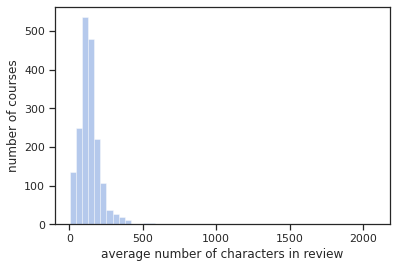

In [12]:
# compute the number of characters in the review
data["Review_len"] = data["Review"].str.len()
# compute the average number of characters in the review for every course
average_len = data.groupby("CourseId").mean().sort_values("Review_len", ascending=False)
# explore statistics
print(average_len.Review_len.describe())
#plot histogram
sns.distplot(average_len["Review_len"], kde=False).set(xlabel="average number of characters in review", ylabel="number of courses",)

### Put number of reviews, average rating and average length of the review together in one DataFrame.

In [13]:
# Merge datasets on index and create new DataFrame "analysis"
# first we will transform most_reviews from Series to DataFrame
df_reviews_number = pd.DataFrame(reviews_number)
# merge df_reviews_number and average_rating
analysis = pd.merge(df_reviews_number, average_rating,  right_index=True, left_index=True)
# transform average_len from Series to DataFrame
df_average_len = pd.DataFrame(average_len.Review_len)
# merge analysis and df_average_len
analysis = pd.merge(analysis, df_average_len,  right_index=True, left_index=True)
# rename columns
analysis.columns = ["reviews_number", "av_rating", "av_review_len"]
# show first 5 rows
analysis.head()

,reviews_number,av_rating,av_review_len
machine-learning,8570,4.899067,129.918436
learning-how-to-learn,7090,4.858392,133.896333
python,5906,4.778869,102.380799
python-data,2372,4.836425,88.512226
python-network-data,1844,4.767896,100.733731


### Let's see whether there are any correlations between columns in the new DataFrame.
There is a weak negative correlation between the average rating and average review length.

In [14]:
# Let's first explore correlations 
analysis.corr()

,reviews_number,av_rating,av_review_len
reviews_number,1.000000,0.054449,-0.023937
av_rating,0.054449,1.000000,-0.252141
av_review_len,-0.023937,-0.252141,1.000000


### That is how the correlation looks on a scatter plot.

[Text(0, 0.5, 'average rating'),
 (0.0, 500.0),
 Text(0.5, 0, 'average number of characters in review')]

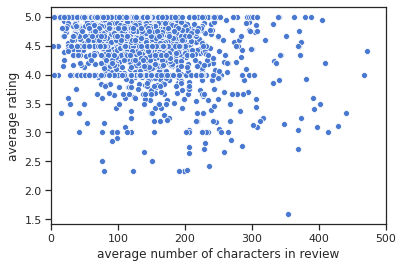

In [15]:
# plot scatter plot with av_review_len as x and av_rating as y
sns.scatterplot(x="av_review_len", y="av_rating", data = analysis).set(xlim=(0,500), xlabel="average number of characters in review", ylabel="average rating")

### Built linear model. 
This model corroborates the negative correlation between the average rating and average review length.

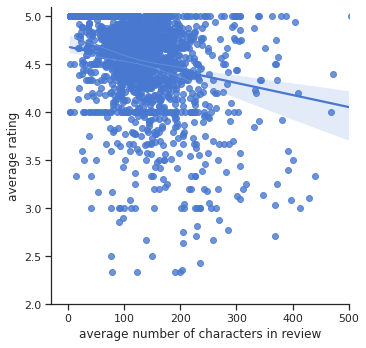

In [16]:
# Show scatter plot with linear model
sns.lmplot(x="av_review_len", y="av_rating", data = analysis).set(xlim=(-30, 500), ylim=(2,5.1), xlabel="average number of characters in review", ylabel="average rating")

## P. S.
### Do people use exclamation mark in the reviews?
On average 0.4 times per review, but there is one review with 421 exclamation marks!!!

In [17]:
# Count the number of "!" in the reviews
data["excl_num"] = data["Review"].str.count("!")
# Explote the statistics
print(data["excl_num"].describe())

count    140320.000000
mean          0.398952
std           1.586506
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         421.000000
Name: excl_num, dtype: float64


### We have to find that review!!!
Apparently, the course "getting-started-with-essay-writing" did not help the student to improve his/her essay writing skills :)

In [18]:
print("Course Id:")
print(data.iloc[data["excl_num"].idxmax()]["CourseId"])
print("Review:")
print(data.iloc[data["excl_num"].idxmax()]["Review"])

Course Id:
getting-started-with-essay-writing
Review:
LOVE IT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
